<a href="https://colab.research.google.com/github/GergelyTuri/context-project/blob/main/notebooks/colocalizaton_dual_10_13_23_series_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyzing RNAsocpe colocalization
* 12/1/2023

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import xml.etree.ElementTree as ET
import seaborn as sns
import numpy as np
from scipy.spatial.distance import cdist
import os


In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
def parse_xml(xml_file_path: str) -> pd.DataFrame:
  tree = ET.parse(xml_file_path)
  root = tree.getroot()

  # Create lists to store data
  types = []
  marker_x_values = []
  marker_y_values = []

  # Iterate through Marker elements
  for marker_type in root.findall('.//Marker_Type'):
      current_type = marker_type.find('Type').text
      for marker in marker_type.findall('.//Marker'):
          marker_x = marker.find('MarkerX').text
          marker_y = marker.find('MarkerY').text

          # Append data to lists
          types.append(current_type)
          marker_x_values.append(marker_x)
          marker_y_values.append(marker_y)

  # Create a DataFrame
  data = {'Type': types, 'MarkerX': marker_x_values, 'MarkerY': marker_y_values}
  df = pd.DataFrame(data)

  # Display the DataFrame
  return df

In [4]:
def calc_pairwise_dist(dataframe: pd.DataFrame):
  # Calculate pairwise distances using scipy's cdist
  type1_coords = dataframe[dataframe['Type'] == '1'][['MarkerX', 'MarkerY']].values
  type2_coords = dataframe[dataframe['Type'] == '2'][['MarkerX', 'MarkerY']].values

  dataframe['MarkerX'] = dataframe['MarkerX'].astype(int)
  dataframe['MarkerY'] = dataframe['MarkerY'].astype(int)

  type1_coords_int = type1_coords.astype(int)
  type2_coords_int = type2_coords.astype(int)

    # Calculate pairwise distances using scipy's cdist
  distances_matrix = cdist(type1_coords_int, type2_coords_int)

  # Find the closest Type 2 point for each Type 1 point
  closest_indices = np.argmin(distances_matrix, axis=1)

  # Create a new DataFrame with Type 1 and closest Type 2 coordinates
  df_closest = pd.DataFrame({
      'Type1_MarkerX': type1_coords[:, 0],
      'Type1_MarkerY': type1_coords[:, 1],
      'Type2_MarkerX': type2_coords[closest_indices, 0],
      'Type2_MarkerY': type2_coords[closest_indices, 1],
  })

  # Calculate distances and add a new column
  df_closest['Distance'] = np.linalg.norm(df_closest[['Type1_MarkerX', 'Type1_MarkerY']].values.astype(int) -
                                          df_closest[['Type2_MarkerX', 'Type2_MarkerY']].values.astype(int), axis=1)

  # Display the DataFrame with the added 'Distance' column
  return df_closest

In [5]:
def plot_distances(dataframe: pd.DataFrame, xml_file_path: str):
  df_filtered = dataframe[dataframe['Distance'] < 15]
  df_filtered['Type1_MarkerX'] = pd.to_numeric(df_filtered['Type1_MarkerX'])
  df_filtered['Type1_MarkerY'] = pd.to_numeric(df_filtered['Type1_MarkerY'])
  df_filtered['Type2_MarkerX'] = pd.to_numeric(df_filtered['Type2_MarkerX'])
  df_filtered['Type2_MarkerY'] = pd.to_numeric(df_filtered['Type2_MarkerY'])

  # Create a scatter plot with seaborn for the filtered DataFrame
  sns.scatterplot(x='Type1_MarkerX', y='Type1_MarkerY', data=df_filtered, palette='Set1')


  # Show the plot
  plt.title('Scatter Plot of Marker Data with Distance < 15')
#  plt.show()
  # Get the parent directory
  parent_folder = os.path.dirname(xml_file_path)

  # Save the plot to the parent directory
  plt.savefig(os.path.join(parent_folder, 'coloc_plot.png'))

 # plt.savefig('plot.png')

In [42]:
# filelocation="/content/drive/Shareddrives/Turi_lab/Data/psilocybin_project/Stephanies/analysis/date/dual_10_13_23/series_1/Cellcounter_dual_10_13_23_series1.xml"
files = [
        # "/content/drive/Shareddrives/Turi_lab/Data/psilocybin_project/Stephanies/analysis/date/dual_10_13_23/series_9/CellCounter_xml_series9.xml",
       #  "/content/drive/Shareddrives/Turi_lab/Data/psilocybin_project/Stephanies/analysis/date/dual_10_13_23/series_1/Cellcounter_dual_10_13_23_series1.xml",
       #  "/content/drive/Shareddrives/Turi_lab/Data/psilocybin_project/Stephanies/analysis/date/dual_10_13_23/series_9/CellCounter_xml_series9.xml",
         #  "/content/drive/Shareddrives/Turi_lab/Data/psilocybin_project/Stephanies/analysis/date/dual_10_13_23/series_10/Cellcounter_dual_10_13_23_series10.xml",
       #   "/content/drive/Shareddrives/Turi_lab/Data/psilocybin_project/Stephanies/analysis/date/3_dual_10_27_23/series_4/CellCounter_xml_series4.xml",
       #    "/content/drive/Shareddrives/Turi_lab/Data/psilocybin_project/Stephanies/analysis/date/2_dual_10_27_23/series_13/CellCounter_xml_series 13.xml",
        #   "/content/drive/Shareddrives/Turi_lab/Data/psilocybin_project/Stephanies/analysis/date/2_dual_10_27_23/series_14/CellCounter_xml_series14.xml",
       #    "/content/drive/Shareddrives/Turi_lab/Data/psilocybin_project/Stephanies/analysis/date/2_dual_10_27_23/series_15/CellCounter_xml_series15.xml",
        #   "/content/drive/Shareddrives/Turi_lab/Data/psilocybin_project/Stephanies/analysis/date/2_dual_10_27_23/series_16/CellCounter_xml_series16.xml",
        #   "/content/drive/Shareddrives/Turi_lab/Data/psilocybin_project/Stephanies/analysis/date/1_dual_10_27_23/series_11/CellCounter_xml_series11.xml",
           "/content/drive/Shareddrives/Turi_lab/Data/psilocybin_project/Stephanies/analysis/date/1_dual_10_27_23/series_14/CellCounter_xml_series14.xml",
         ]

File name /content/drive/Shareddrives/Turi_lab/Data/psilocybin_project/Stephanies/analysis/date/1_dual_10_27_23/series_14/CellCounter_xml_series14.xml


<ipython-input-5-3085fefb6b59>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Type1_MarkerX'] = pd.to_numeric(df_filtered['Type1_MarkerX'])
<ipython-input-5-3085fefb6b59>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Type1_MarkerY'] = pd.to_numeric(df_filtered['Type1_MarkerY'])
<ipython-input-5-3085fefb6b59>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

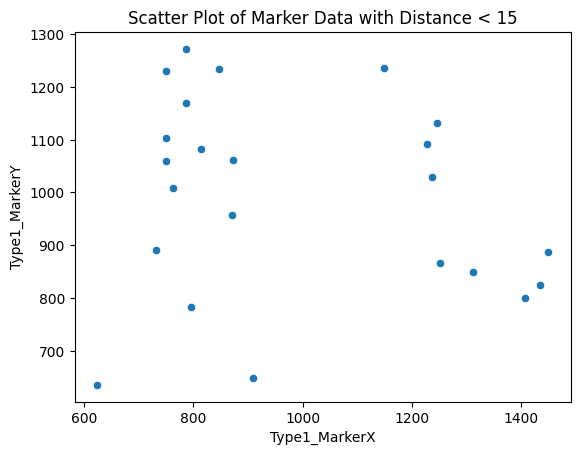

In [43]:
for xml_file in files:
  print(f'File name {xml_file}')
  parsed_df = parse_xml(xml_file)
  to_plot = calc_pairwise_dist(parsed_df)
  plot_distances(to_plot, xml_file)

In [4]:
# tree = ET.parse(filelocation)
# root = tree.getroot()

In [ ]:
# # Create lists to store data
# types = []
# marker_x_values = []
# marker_y_values = []

# # Iterate through Marker elements
# for marker_type in root.findall('.//Marker_Type'):
#     current_type = marker_type.find('Type').text
#     for marker in marker_type.findall('.//Marker'):
#         marker_x = marker.find('MarkerX').text
#         marker_y = marker.find('MarkerY').text

#         # Append data to lists
#         types.append(current_type)
#         marker_x_values.append(marker_x)
#         marker_y_values.append(marker_y)

# # Create a DataFrame
# data = {'Type': types, 'MarkerX': marker_x_values, 'MarkerY': marker_y_values}
# df = pd.DataFrame(data)

# # Display the DataFrame
# df


In [6]:
# # Calculate pairwise distances using scipy's cdist
# type1_coords = df[df['Type'] == '1'][['MarkerX', 'MarkerY']].values
# type2_coords = df[df['Type'] == '2'][['MarkerX', 'MarkerY']].values

In [9]:
# df['MarkerX'] = df['MarkerX'].astype(int)
# df['MarkerY'] = df['MarkerY'].astype(int)

In [15]:
# type1_coords_int = type1_coords.astype(int)
# type2_coords_int = type2_coords.astype(int)

In [17]:
# type(type1_coords_int)

numpy.ndarray

In [ ]:
# # Calculate pairwise distances using scipy's cdist
# distances_matrix = cdist(type1_coords_int, type2_coords_int)

# # Find the closest Type 2 point for each Type 1 point
# closest_indices = np.argmin(distances_matrix, axis=1)

# # Create a new DataFrame with Type 1 and closest Type 2 coordinates
# df_closest = pd.DataFrame({
#     'Type1_MarkerX': type1_coords[:, 0],
#     'Type1_MarkerY': type1_coords[:, 1],
#     'Type2_MarkerX': type2_coords[closest_indices, 0],
#     'Type2_MarkerY': type2_coords[closest_indices, 1],
# })

# # Calculate distances and add a new column
# df_closest['Distance'] = np.linalg.norm(df_closest[['Type1_MarkerX', 'Type1_MarkerY']].values.astype(int) -
#                                          df_closest[['Type2_MarkerX', 'Type2_MarkerY']].values.astype(int), axis=1)

# # Display the DataFrame with the added 'Distance' column
# df_closest.head()

In [ ]:
# df_filtered = df_closest[df_closest['Distance'] < 15]
# df_filtered['Type1_MarkerX'] = pd.to_numeric(df_filtered['Type1_MarkerX'])
# df_filtered['Type1_MarkerY'] = pd.to_numeric(df_filtered['Type1_MarkerY'])
# df_filtered['Type2_MarkerX'] = pd.to_numeric(df_filtered['Type2_MarkerX'])
# df_filtered['Type2_MarkerY'] = pd.to_numeric(df_filtered['Type2_MarkerY'])

# # Create a scatter plot with seaborn for the filtered DataFrame
# sns.scatterplot(x='Type1_MarkerX', y='Type1_MarkerY', data=df_filtered, palette='Set1')


# # Show the plot
# plt.title('Scatter Plot of Marker Data with Distance < 15')
# plt.show()
# plt.savefig('plot.png')

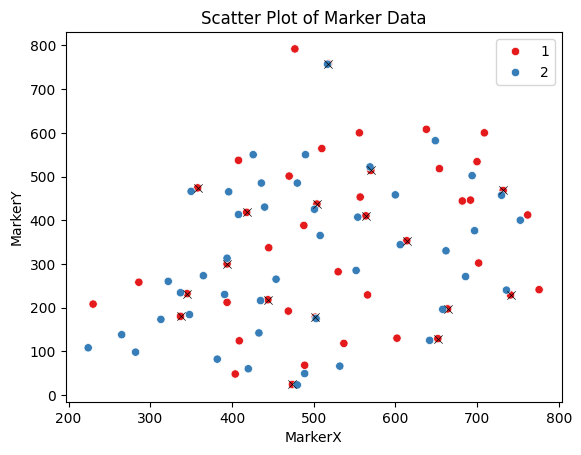

In [28]:
# Create a scatter plot with seaborn
sns.scatterplot(x='MarkerX', y='MarkerY', hue='Type', data=df, palette='Set1')
sns.scatterplot(x='Type1_MarkerX', y='Type1_MarkerY', data=df_filtered, color='k', marker='x')
# Show the plot
plt.title('Scatter Plot of Marker Data')
plt.show()